In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("ggplot")

from src import paths

# Why? An ugly list of constants in `load_ftract` function in `src/data.py`

This notebook shows why we have the ugly list of labels for DKT and Destrieux parcellations. 

In [2]:
labels = np.loadtxt(paths.path('external/F-TRACT/DKT/DKT.txt'), dtype=str)

In [3]:
df = pd.DataFrame(
    data=np.loadtxt(paths.path('external/F-TRACT/DKT/amplitude__mad.txt.gz')),
    index=labels, columns=labels
)

As shown below, the data and labels for these parcellations are saved with much more labels than there are ROIs in them (~70 for DKT). Most of the values are NaNs.

In [4]:
df

,Unknown,Left-Cerebral-Exterior,Left-Cerebral-White-Matter,Left-Cerebral-Cortex,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-Exterior,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,...,wm_rh_S_precentral-sup-part,wm_rh_S_suborbital,wm_rh_S_subparietal,wm_rh_S_temporal_inf,wm_rh_S_temporal_sup,wm_rh_S_temporal_transverse,ctx_lh_AnteroHippocampus,ctx_lh_PosteroHippocampus,ctx_rh_AnteroHippocampus,ctx_rh_PosteroHippocampus
Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Left-Cerebral-Exterior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Left-Cerebral-White-Matter,NaN,NaN,2.041,NaN,3.085,1.069,NaN,NaN,1.413,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Left-Cerebral-Cortex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Left-Lateral-Ventricle,NaN,NaN,3.057,NaN,9.357,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wm_rh_S_temporal_transverse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctx_lh_AnteroHippocampus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctx_lh_PosteroHippocampus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctx_rh_AnteroHippocampus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We need to filter the interesting part of the table above. We use the following list of ROIs obtained from Freesurfer lookup table (https://surfer.nmr.mgh.harvard.edu/fswiki/FsTutorial/AnatomicalROI/FreeSurferColorLUT).

In [5]:
dkt_roi = [
 'ctx-lh-bankssts',
 'ctx-lh-caudalanteriorcingulate',
 'ctx-lh-caudalmiddlefrontal',
 'ctx-lh-cuneus',
 'ctx-lh-entorhinal',
 'ctx-lh-fusiform',
 'ctx-lh-inferiorparietal',
 'ctx-lh-inferiortemporal',
 'ctx-lh-isthmuscingulate',
 'ctx-lh-lateraloccipital',
 'ctx-lh-lateralorbitofrontal',
 'ctx-lh-lingual',
 'ctx-lh-medialorbitofrontal',
 'ctx-lh-middletemporal',
 'ctx-lh-parahippocampal',
 'ctx-lh-paracentral',
 'ctx-lh-parsopercularis',
 'ctx-lh-parsorbitalis',
 'ctx-lh-parstriangularis',
 'ctx-lh-pericalcarine',
 'ctx-lh-postcentral',
 'ctx-lh-posteriorcingulate',
 'ctx-lh-precentral',
 'ctx-lh-precuneus',
 'ctx-lh-rostralanteriorcingulate',
 'ctx-lh-rostralmiddlefrontal',
 'ctx-lh-superiorfrontal',
 'ctx-lh-superiorparietal',
 'ctx-lh-superiortemporal',
 'ctx-lh-supramarginal',
 'ctx-lh-frontalpole',
 'ctx-lh-temporalpole',
 'ctx-lh-transversetemporal',
 'ctx-lh-insula',
 'ctx-rh-bankssts',
 'ctx-rh-caudalanteriorcingulate',
 'ctx-rh-caudalmiddlefrontal',
 'ctx-rh-cuneus',
 'ctx-rh-entorhinal',
 'ctx-rh-fusiform',
 'ctx-rh-inferiorparietal',
 'ctx-rh-inferiortemporal',
 'ctx-rh-isthmuscingulate',
 'ctx-rh-lateraloccipital',
 'ctx-rh-lateralorbitofrontal',
 'ctx-rh-lingual',
 'ctx-rh-medialorbitofrontal',
 'ctx-rh-middletemporal',
 'ctx-rh-parahippocampal',
 'ctx-rh-paracentral',
 'ctx-rh-parsopercularis',
 'ctx-rh-parsorbitalis',
 'ctx-rh-parstriangularis',
 'ctx-rh-pericalcarine',
 'ctx-rh-postcentral',
 'ctx-rh-posteriorcingulate',
 'ctx-rh-precentral',
 'ctx-rh-precuneus',
 'ctx-rh-rostralanteriorcingulate',
 'ctx-rh-rostralmiddlefrontal',
 'ctx-rh-superiorfrontal',
 'ctx-rh-superiorparietal',
 'ctx-rh-superiortemporal',
 'ctx-rh-supramarginal',
 'ctx-rh-frontalpole',
 'ctx-rh-temporalpole',
 'ctx-rh-transversetemporal',
 'ctx-rh-insula'
]

Select only the labels from the list:

In [6]:
df_dkt = df.loc[dkt_roi, dkt_roi]

In [7]:
df_dkt

,ctx-lh-bankssts,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal,ctx-lh-cuneus,ctx-lh-entorhinal,ctx-lh-fusiform,ctx-lh-inferiorparietal,ctx-lh-inferiortemporal,ctx-lh-isthmuscingulate,ctx-lh-lateraloccipital,...,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula
ctx-lh-bankssts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctx-lh-caudalanteriorcingulate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctx-lh-caudalmiddlefrontal,NaN,NaN,4.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctx-lh-cuneus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctx-lh-entorhinal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ctx-rh-supramarginal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.689,3.437,NaN,NaN,NaN,1.971
ctx-rh-frontalpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctx-rh-temporalpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctx-rh-transversetemporal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.893


We see that now the data matrix makes sense, there are 68 ROIs (which is the right number for this parcellation) and the election contains data.

Text(0.5, 1.0, 'amplitude, DKT')

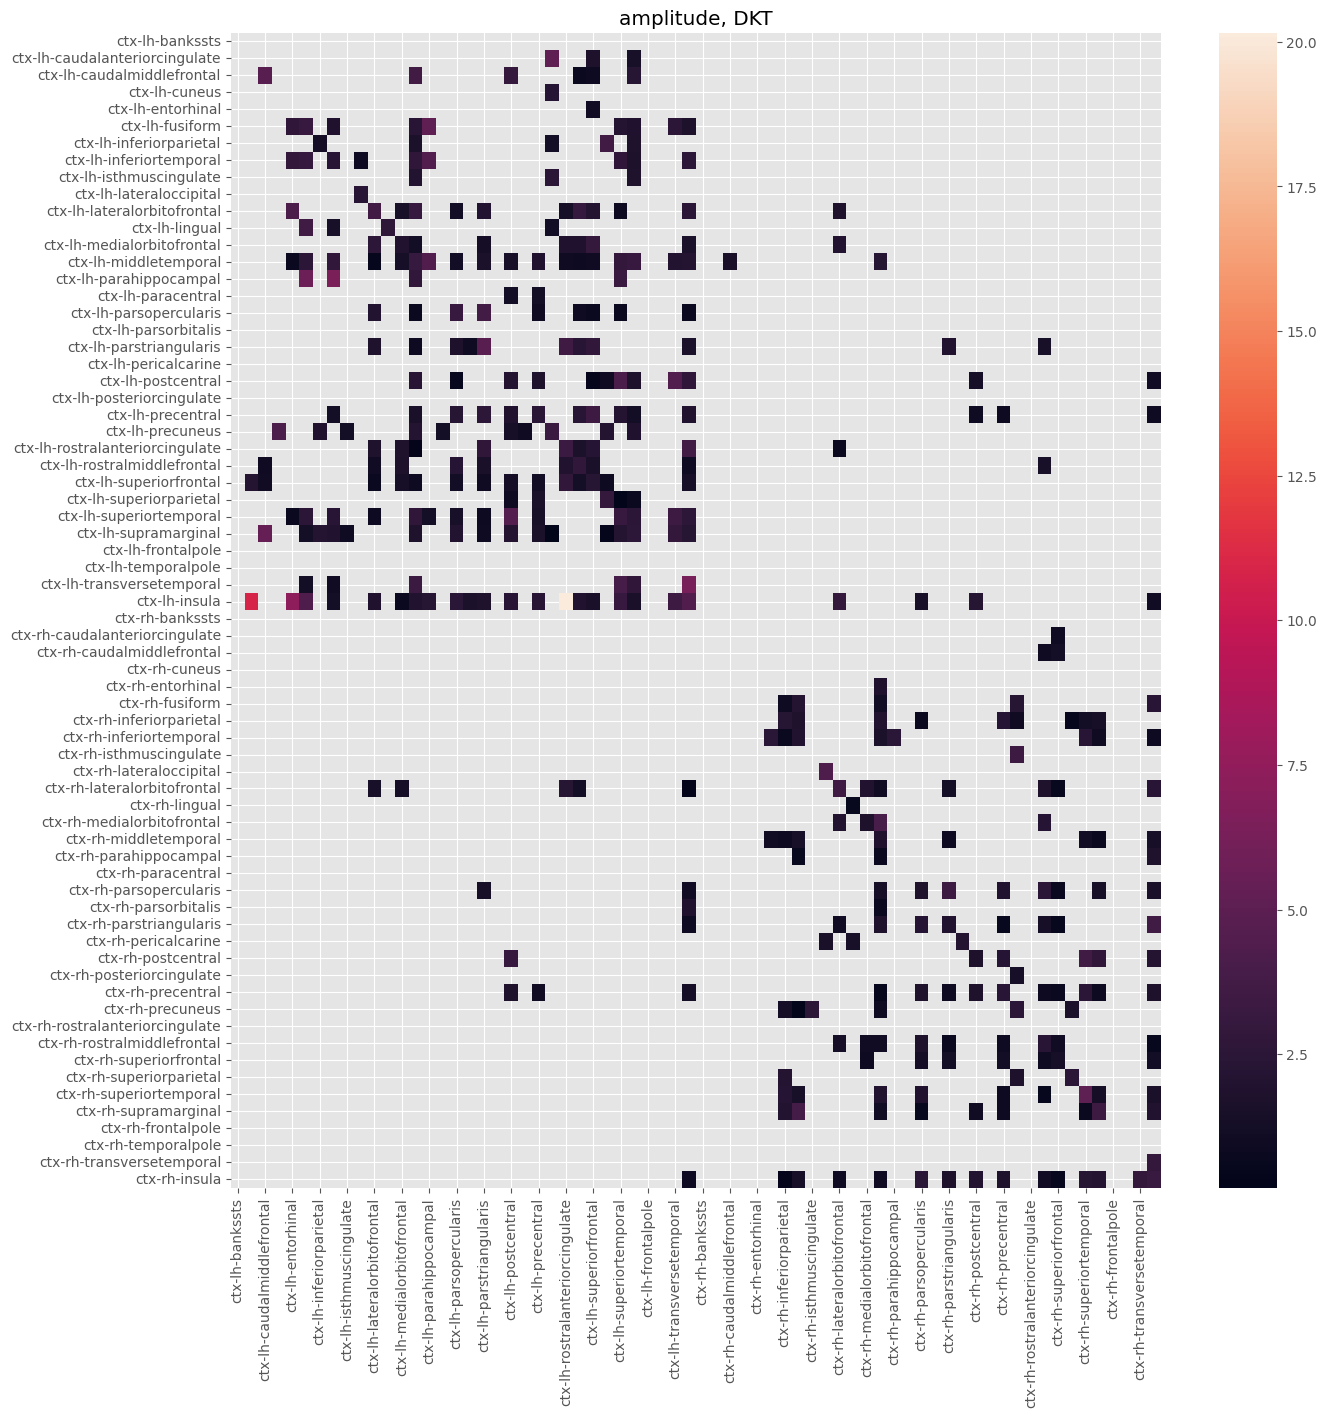

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df_dkt)
plt.title('amplitude, DKT')